### Predicting the price of houses based on past data taken from a listings website

#### Dataset:

The dataset contains roughly 550 listings of properties taken from a listings website. All data has been anonymised by removing any location data. The following 8 attributes are available:

Price - price of listing - the attribute to be predicted <br>
Bedroom - number of bedrooms<br>
Bathroom - number of bathrooms<br>
Floors - number of floors<br>
Parking - number of available parking spaces<br>
Views - numbers of views of the webpage listing<br>
Amenities - a list of amenities as listed on the website<br>
Interest - a measure of user interest in a property based on website metrics, a value out of 125

In [148]:
##Importing necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [149]:
#Data Loading
df=pd.read_csv('housepricedata.csv')

### Data Exploration

In [150]:
#Data top 3 rows
df.head(3)

,Price,Bedroom,Bathroom,Floors,Parking,Views,Amenities,Interest
0,900000.0,6,3,2.0,10,17,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",105
1,800000.0,Five,3,2.0,9,26,"['Parking', 'Garage', 'Fencing', 'Frontyard', ...",87
2,700000.0,5,3,2.0,12,154,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",56


In [151]:
#Checking Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 8 columns):
Price        549 non-null float64
Bedroom      549 non-null object
Bathroom     549 non-null int64
Floors       484 non-null float64
Parking      549 non-null int64
Views        549 non-null int64
Amenities    549 non-null object
Interest     549 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 34.4+ KB


In [152]:
#Checking data types 
df.dtypes

Price        float64
Bedroom       object
Bathroom       int64
Floors       float64
Parking        int64
Views          int64
Amenities     object
Interest       int64
dtype: object

In [153]:
#Checking Data Description
df.describe()

,Price,Bathroom,Floors,Parking,Views,Interest
count,549.000000,549.000000,484.000000,549.000000,549.000000,549.000000
mean,318239.107450,3.921676,2.761054,1.992714,1461.431694,34.908925
std,170600.331877,1.514909,0.919749,1.463654,3102.793144,23.206131
min,65000.000000,1.000000,0.000000,1.000000,17.000000,0.000000
25%,195000.000000,3.000000,2.375000,1.000000,286.000000,18.000000
50%,276000.000000,4.000000,3.000000,1.000000,514.000000,31.000000
75%,390000.000000,5.000000,3.000000,3.000000,1000.000000,47.000000
max,900000.000000,10.000000,13.000000,12.000000,34500.000000,125.000000


In [154]:
df.describe(include='O')

,Bedroom,Amenities
count,549,549
unique,10,395
top,5,[]
freq,153,54


In [155]:
# Checking Nulls
df.isnull().sum()

Price         0
Bedroom       0
Bathroom      0
Floors       65
Parking       0
Views         0
Amenities     0
Interest      0
dtype: int64

From all above Analysis. Below are the observations which needs to fix during Pre-processing stage: <br>
<br>
1.Bedroom labelled as object <br>
2.Amenities stored as a list <br>
3.Amenities contain empty lists <br>
4.Floor contains Missing Values <br>

### Data Pre-Processing

##### Bedroom Variable- Preprocessing <br>
-Bedroom Labelled as Object <br>
-Solution : Converting to Integer data type

In [156]:
df.Bedroom.dtype

dtype('O')

In [157]:
df.Bedroom.unique()

array(['6', 'Five', '5', '3', '4', '2', '7', '9', '8', '1'], dtype=object)

In [158]:
#Replacing Five with 5
df.Bedroom.replace('Five','5',inplace=True)

In [159]:
df.Bedroom.unique()

array(['6', '5', '3', '4', '2', '7', '9', '8', '1'], dtype=object)

In [160]:
df.Bedroom=df.Bedroom.astype('int64')

In [161]:
df.dtypes

Price        float64
Bedroom        int64
Bathroom       int64
Floors       float64
Parking        int64
Views          int64
Amenities     object
Interest       int64
dtype: object

#### Floors Variable- Preprocessing <br>
-Floor Containing Missing Values <br>
-Solution : Applying Imputation Techniques

In [162]:
df.Floors.unique()

array([ 2.  ,  3.  ,  2.5 ,  1.  ,   nan,  3.5 ,  4.  ,  1.5 ,  5.  ,
        1.35, 10.  , 13.  ,  0.  ,  6.  ])

In [163]:
#Checking Missing Values before Imputation
df.Floors.isnull().sum()

65

In [164]:
# Checking correlation 
df.corr()

,Price,Bedroom,Bathroom,Floors,Parking,Views,Interest
Price,1.000000,0.245195,0.465975,0.124136,0.603584,-0.065211,0.695943
Bedroom,0.245195,1.000000,0.576825,0.424017,0.147763,-0.049697,0.136735
Bathroom,0.465975,0.576825,1.000000,0.370925,0.221126,-0.146074,0.287260
Floors,0.124136,0.424017,0.370925,1.000000,0.036767,0.002123,0.028682
Parking,0.603584,0.147763,0.221126,0.036767,1.000000,-0.027236,0.435477
Views,-0.065211,-0.049697,-0.146074,0.002123,-0.027236,1.000000,-0.039148
Interest,0.695943,0.136735,0.287260,0.028682,0.435477,-0.039148,1.000000


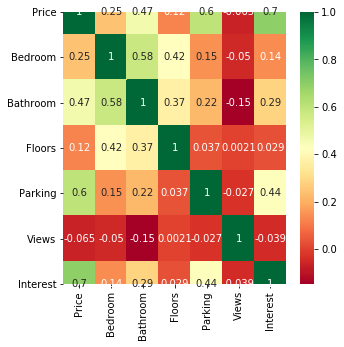

In [165]:
plt.figure(figsize=(5,5))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

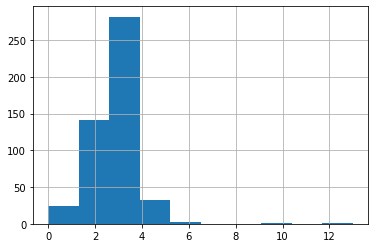

In [166]:
#Checking Distribution of Floor Variable
df.Floors.hist()

In [167]:
df.Floors.value_counts()

3.00     278
2.00      83
2.50      45
4.00      29
1.00      23
1.50      13
3.50       4
5.00       3
6.00       2
1.35       1
0.00       1
13.00      1
10.00      1
Name: Floors, dtype: int64

##### Median Imputation has been incorporated to replace Nulls values because of <br>
Less Correlation Effect(Cannot use Regression Imputation) <br>
Data is not distributed evenly(Cannot use Mean Imputation)

In [168]:
#Median Imputation
df.Floors.fillna(df.Floors.median(),inplace=True)

In [169]:
#Checking Missing Values After Imputation
df.Floors.isnull().sum()

0

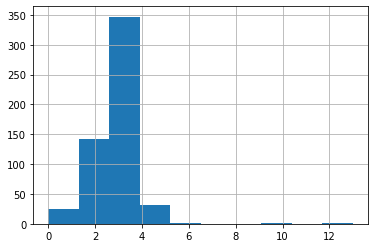

In [170]:
#Checking Distribution after Imputation
df.Floors.hist()

#### Amenities Variable- Preprocessing <br>
-Amenities is stored as a list <br>
-Solution : Expanding Cells contaning list in to Columns using Pandas and setting indicator variables (0 and 1) that denote the presence or absence of the column in each row.

In [171]:
df.head(3)

,Price,Bedroom,Bathroom,Floors,Parking,Views,Amenities,Interest
0,900000.0,6,3,2.0,10,17,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",105
1,800000.0,5,3,2.0,9,26,"['Parking', 'Garage', 'Fencing', 'Frontyard', ...",87
2,700000.0,5,3,2.0,12,154,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",56


In [172]:
#Checking type of List
for p in list(df.Amenities):
    print(type(p))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [173]:
#Converting String to List by stripping unwanted symbols
df['Amenities_new']=df['Amenities'].str.strip('[').str.strip(']').str.split(', ')

In [174]:
df.head(3)

,Price,Bedroom,Bathroom,Floors,Parking,Views,Amenities,Interest,Amenities_new
0,900000.0,6,3,2.0,10,17,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",105,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,800000.0,5,3,2.0,9,26,"['Parking', 'Garage', 'Fencing', 'Frontyard', ...",87,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,700000.0,5,3,2.0,12,154,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",56,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."


In [175]:
for p in list(df.Amenities_new):
    print(type(p))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [176]:
#Extract a list of unique values from the Amenities_new column
amenities_iter = (set(p) for p in df.Amenities_new)
amenities = sorted(set.union(*amenities_iter))
amenities

['',
 "'Air Condition'",
 "'Backyard'",
 "'Balcony'",
 "'CCTV'",
 "'Cafeteria'",
 "'Deck'",
 "'Drainage'",
 "'Electricity Backup'",
 "'Fencing'",
 "'Frontyard'",
 "'Garage'",
 "'Garden'",
 "'Gym'",
 "'Intercom'",
 "'Internet'",
 "'Jacuzzi'",
 "'Kids Playground'",
 "'Lawn'",
 "'Lift'",
 "'Maintenance'",
 "'Microwave'",
 "'Modular Kitchen'",
 "'Parking'",
 "'Security Staff'",
 "'Solar Water'",
 "'Store Room'",
 "'Swimming Pool'",
 "'TV Cable'",
 "'Washing Machine'",
 "'Water Supply'",
 "'Water Tank'",
 "'Water Well'",
 "'Wifi'"]

In [177]:
#Create a dummy dataset with Zero initializion
dummies = pd.DataFrame(np.zeros((len(df), len(amenities)), dtype=np.int), columns=amenities)
dummies

,,'Air Condition','Backyard','Balcony','CCTV','Cafeteria','Deck','Drainage','Electricity Backup','Fencing',...,'Security Staff','Solar Water','Store Room','Swimming Pool','TV Cable','Washing Machine','Water Supply','Water Tank','Water Well','Wifi'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
#iterate through the original dataframe and set entries in each row of the dummy to 1
for i, amenities in enumerate(df.Amenities_new):
    dummies.ix[i, amenities] = 1
dummies

,,'Air Condition','Backyard','Balcony','CCTV','Cafeteria','Deck','Drainage','Electricity Backup','Fencing',...,'Security Staff','Solar Water','Store Room','Swimming Pool','TV Cable','Washing Machine','Water Supply','Water Tank','Water Well','Wifi'
0,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,1,1
1,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,1,1
2,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,1,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0,0,1,1,0,0,1,1,0,1,...,0,0,0,0,1,0,1,0,0,1
545,0,0,1,1,0,0,1,1,0,1,...,0,0,0,0,1,0,1,0,0,1
546,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
547,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [179]:
dummies.head()

,,'Air Condition','Backyard','Balcony','CCTV','Cafeteria','Deck','Drainage','Electricity Backup','Fencing',...,'Security Staff','Solar Water','Store Room','Swimming Pool','TV Cable','Washing Machine','Water Supply','Water Tank','Water Well','Wifi'
0,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,1,1
1,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,1,1
2,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,1,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,1,1


In [180]:
#Concatenating With Original Dataframe
data=pd.concat([df[:], dummies[:]], axis=1)

In [181]:
data.columns

Index(['Price', 'Bedroom', 'Bathroom', 'Floors', 'Parking', 'Views',
       'Amenities', 'Interest', 'Amenities_new', '', ''Air Condition'',
       ''Backyard'', ''Balcony'', ''CCTV'', ''Cafeteria'', ''Deck'',
       ''Drainage'', ''Electricity Backup'', ''Fencing'', ''Frontyard'',
       ''Garage'', ''Garden'', ''Gym'', ''Intercom'', ''Internet'',
       ''Jacuzzi'', ''Kids Playground'', ''Lawn'', ''Lift'', ''Maintenance'',
       ''Microwave'', ''Modular Kitchen'', ''Parking'', ''Security Staff'',
       ''Solar Water'', ''Store Room'', ''Swimming Pool'', ''TV Cable'',
       ''Washing Machine'', ''Water Supply'', ''Water Tank'', ''Water Well'',
       ''Wifi''],
      dtype='object')

In [182]:
data.head(3)

,Price,Bedroom,Bathroom,Floors,Parking,Views,Amenities,Interest,Amenities_new,,...,'Security Staff','Solar Water','Store Room','Swimming Pool','TV Cable','Washing Machine','Water Supply','Water Tank','Water Well','Wifi'
0,900000.0,6,3,2.0,10,17,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",105,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",0,...,0,1,0,0,1,0,1,1,1,1
1,800000.0,5,3,2.0,9,26,"['Parking', 'Garage', 'Fencing', 'Frontyard', ...",87,"['Parking', 'Garage', 'Fencing', 'Frontyard', ...",0,...,0,1,0,0,1,0,1,1,1,1
2,700000.0,5,3,2.0,12,154,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",56,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",0,...,0,1,0,0,1,0,1,1,1,1


In [183]:
#Dropping Unnecessary Columns
data.drop(columns=['Amenities','Amenities_new',''],inplace=True)

In [184]:
data.head(3)

,Price,Bedroom,Bathroom,Floors,Parking,Views,Interest,'Air Condition','Backyard','Balcony',...,'Security Staff','Solar Water','Store Room','Swimming Pool','TV Cable','Washing Machine','Water Supply','Water Tank','Water Well','Wifi'
0,900000.0,6,3,2.0,10,17,105,0,1,1,...,0,1,0,0,1,0,1,1,1,1
1,800000.0,5,3,2.0,9,26,87,0,1,1,...,0,1,0,0,1,0,1,1,1,1
2,700000.0,5,3,2.0,12,154,56,0,1,1,...,0,1,0,0,1,0,1,1,1,1


In [185]:
#Checking Missing Values
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

### Exploratory Data Analysis

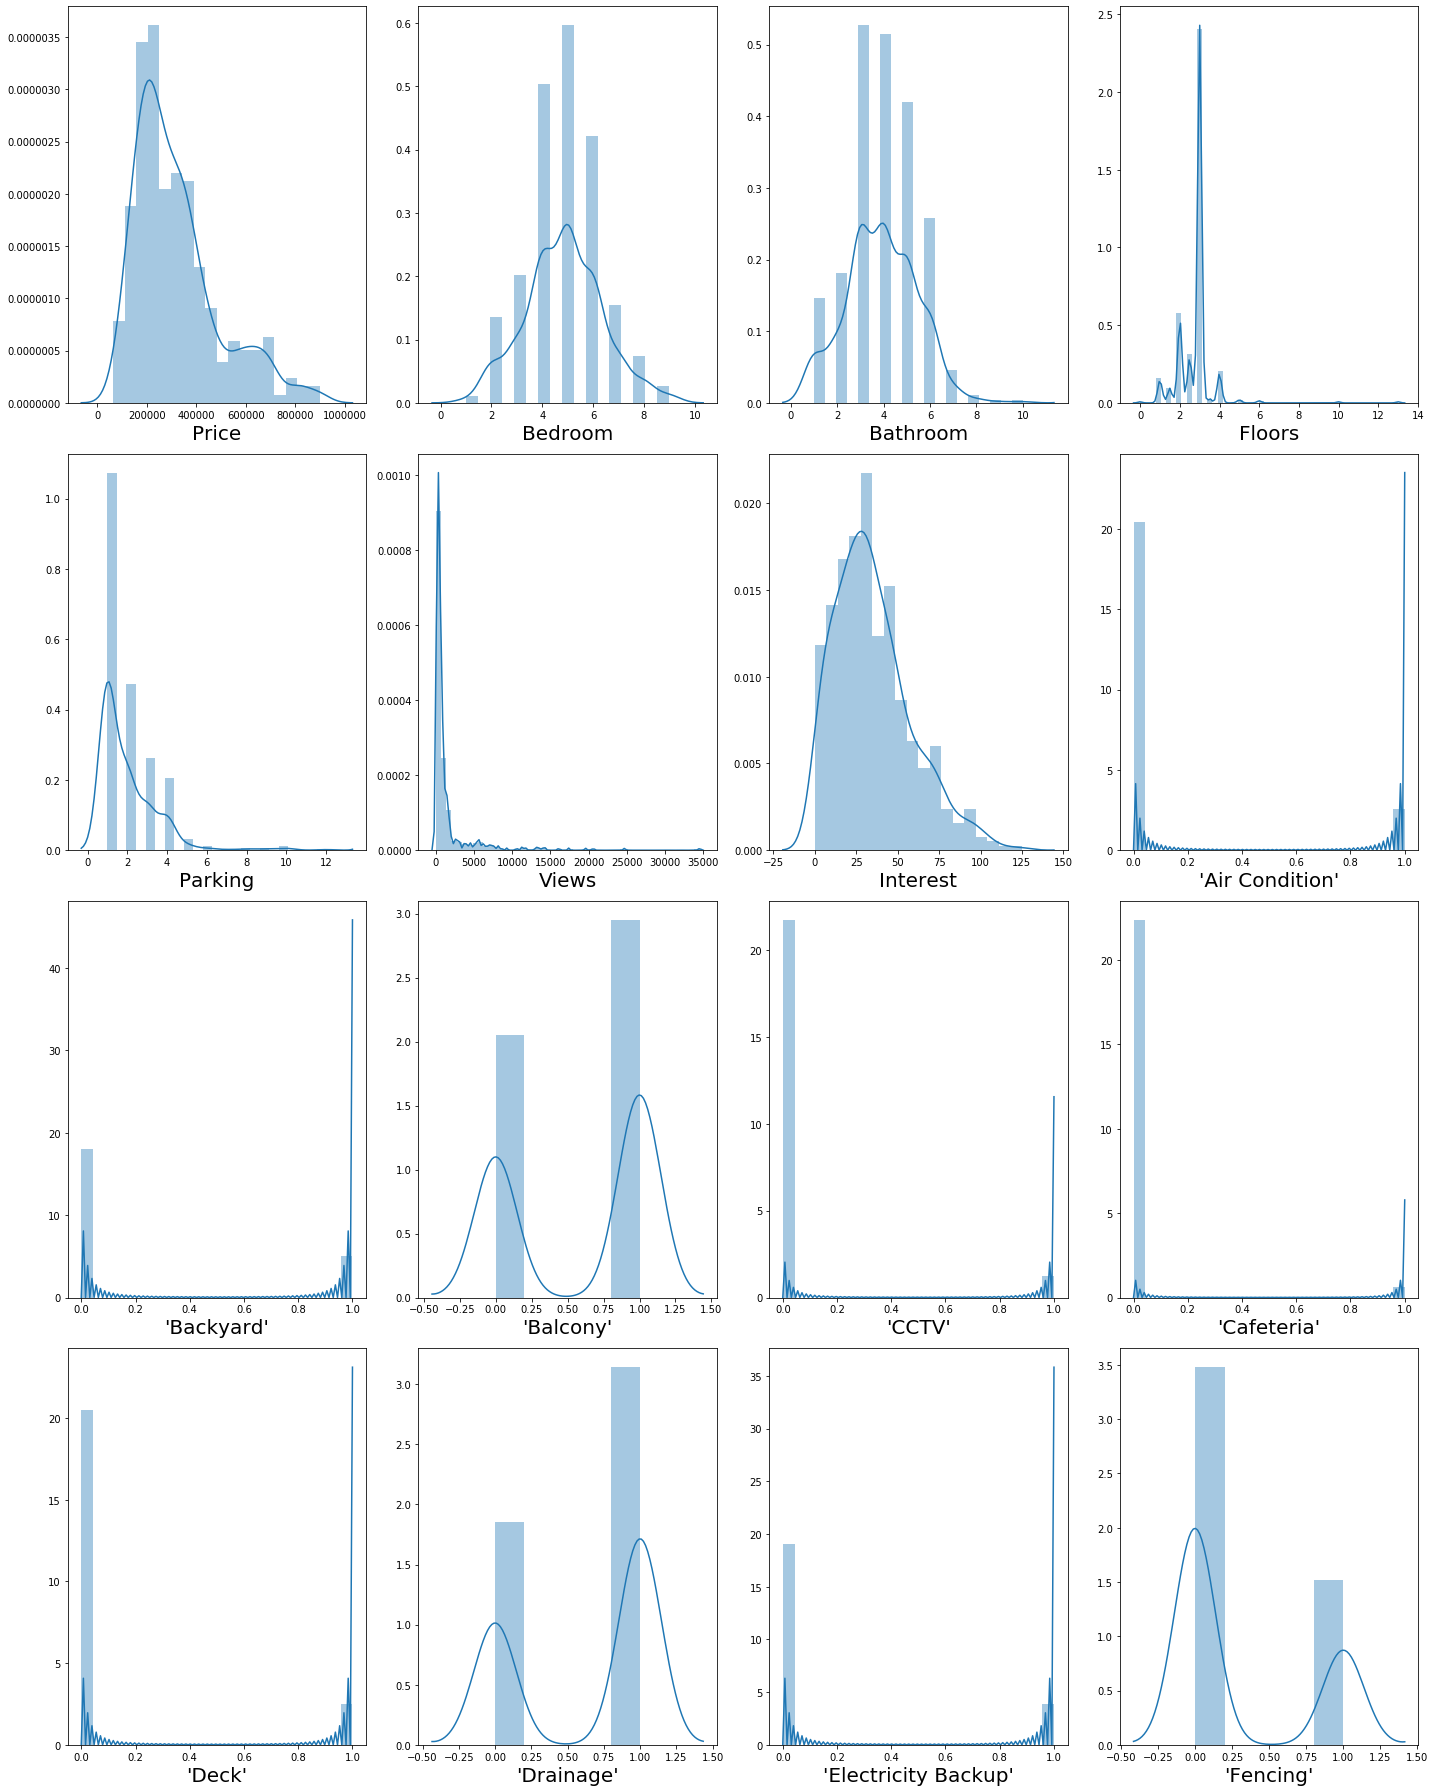

In [186]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough 

In [187]:
#Checking Correlations of Data
data.corr()

,Price,Bedroom,Bathroom,Floors,Parking,Views,Interest,'Air Condition','Backyard','Balcony',...,'Security Staff','Solar Water','Store Room','Swimming Pool','TV Cable','Washing Machine','Water Supply','Water Tank','Water Well','Wifi'
Price,1.000000,0.245195,0.465975,0.118878,0.603584,-0.065211,0.695943,0.321190,0.203251,0.102451,...,0.072333,0.304278,0.042024,-0.056685,0.029893,0.209066,0.104160,0.018890,0.063712,0.099695
Bedroom,0.245195,1.000000,0.576825,0.393878,0.147763,-0.049697,0.136735,-0.059510,-0.065566,0.079881,...,-0.058653,0.159498,0.128390,-0.134717,-0.006769,-0.049869,0.029300,0.053071,0.007437,-0.000620
Bathroom,0.465975,0.576825,1.000000,0.349995,0.221126,-0.146074,0.287260,0.056591,-0.013668,-0.060254,...,-0.006091,0.161730,0.049829,-0.141636,-0.154735,0.002279,-0.086899,-0.114101,-0.123561,-0.119284
Floors,0.118878,0.393878,0.349995,1.000000,0.034957,0.001901,0.032447,-0.001004,-0.104283,0.088740,...,0.014962,0.050633,-0.011899,0.115081,-0.021584,-0.026993,0.004786,-0.041264,-0.079616,-0.029632
Parking,0.603584,0.147763,0.221126,0.034957,1.000000,-0.027236,0.435477,0.128595,0.205168,0.135150,...,0.000835,0.160261,-0.038269,-0.067203,0.107234,0.027766,0.094351,0.063226,-0.009406,0.155780
Views,-0.065211,-0.049697,-0.146074,0.001901,-0.027236,1.000000,-0.039148,-0.078049,-0.013040,0.142917,...,0.100794,0.032479,0.171052,0.128751,0.196336,-0.079859,0.132480,0.062680,0.187722,0.116759
Interest,0.695943,0.136735,0.287260,0.032447,0.435477,-0.039148,1.000000,0.212378,0.135155,0.082350,...,0.131259,0.196457,0.062025,-0.059000,-0.016408,0.098113,0.048972,0.021625,0.036653,0.093662
'Air Condition',0.321190,-0.059510,0.056591,-0.001004,0.128595,-0.078049,0.212378,1.000000,0.334473,0.223917,...,0.047405,0.265237,-0.029161,0.059895,0.162002,0.566612,0.197641,0.176258,0.251179,0.242309
'Backyard',0.203251,-0.065566,-0.013668,-0.104283,0.205168,-0.013040,0.135155,0.334473,1.000000,0.294567,...,0.074536,0.273362,-0.060161,0.021322,0.187815,0.463513,0.245537,0.221424,0.309456,0.334172
'Balcony',0.102451,0.079881,-0.060254,0.088740,0.135150,0.142917,0.082350,0.223917,0.294567,1.000000,...,0.094229,0.329991,0.254004,0.137520,0.447214,0.225015,0.470124,0.432306,0.261641,0.444225


In [188]:
# Seperating Dependent and independent variables
x=data.drop(columns=['Price'],axis=1)
y=data['Price']
x.shape,y.shape

((549, 39), (549,))

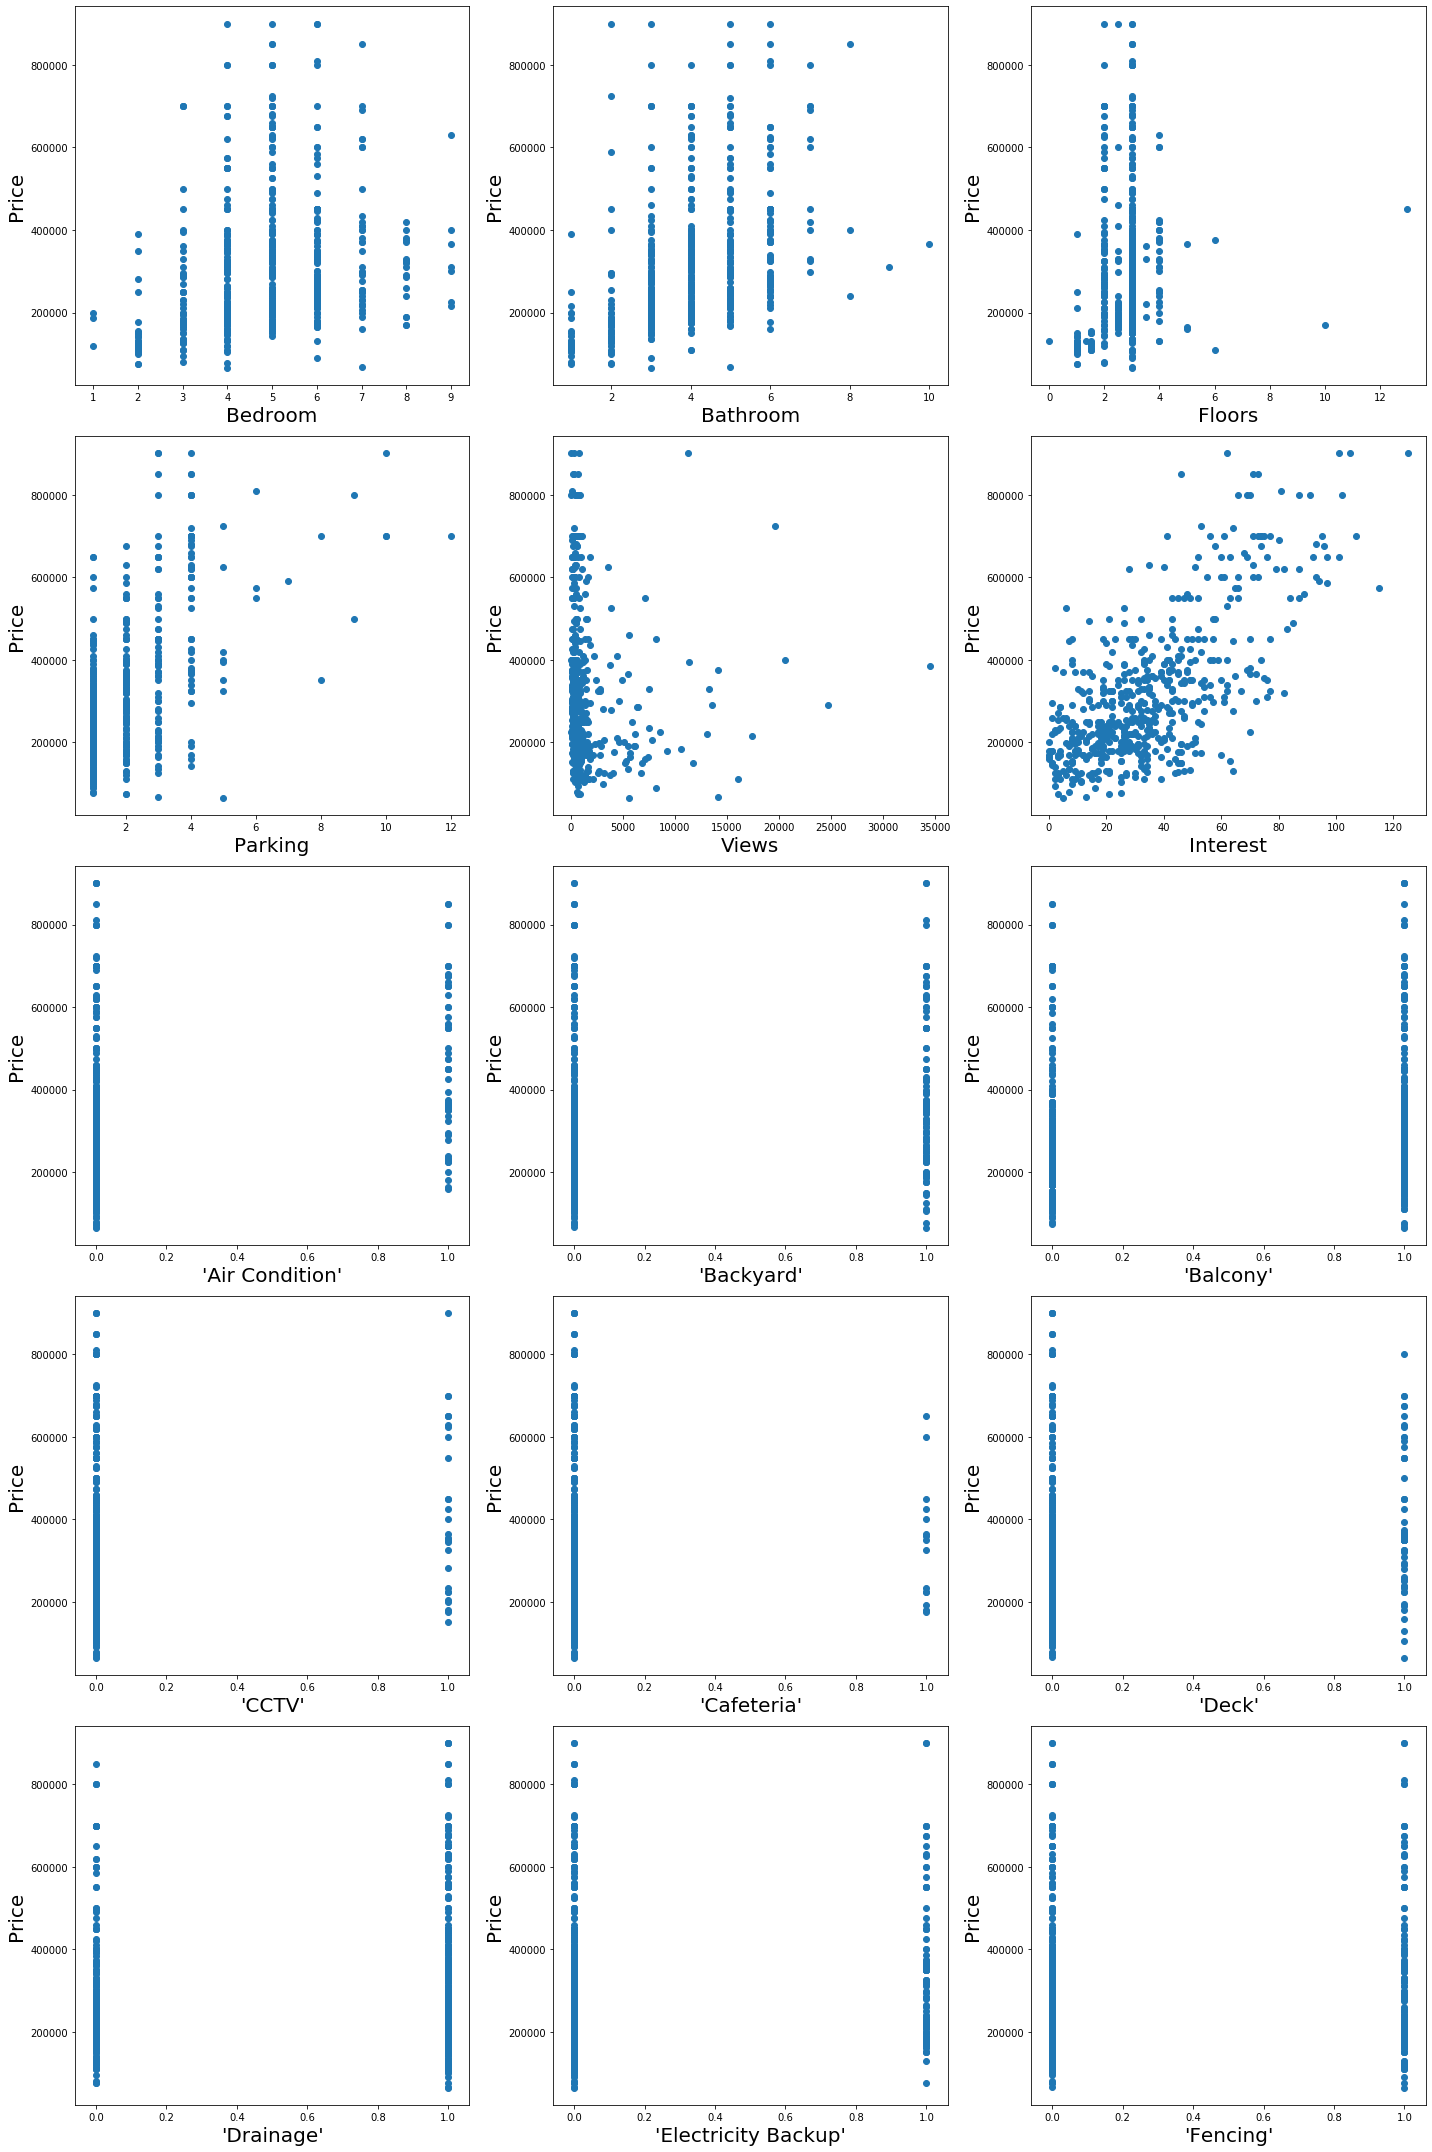

In [189]:
# visualize the relationship between the features and the response using scatterplots
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Observations <br>
- Not All the varaibles are in Linear relationship with Target Variable <br>
- Views,Cafeteria are least correlated variables with respect to target variable 
- As Non-linear variables cannot contribute much to train a linear regression,We can reduce dimentionality of data to Fewer(essential) variables <br>
- Interest seems Almost linear.Properties holdings most people interest are costly

### Modelling

In [190]:
#Performing Normalization to get rid of scale
X_scaled=StandardScaler().fit_transform(x)

In [191]:
X_scaled.shape

(549, 39)

In [192]:
#Checking Multi Collinearlity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()


vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = x.columns

In [193]:
vif

,VIF,Features
0,1.934555,Bedroom
1,2.131602,Bathroom
2,1.578773,Floors
3,1.544663,Parking
4,1.269652,Views
5,1.499202,Interest
6,2.142251,'Air Condition'
7,2.370209,'Backyard'
8,1.816546,'Balcony'
9,2.096764,'CCTV'


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

In [194]:
#splitting data in train and test.
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=47)

In [195]:
#Chekcing Shapes
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((411, 39), (138, 39), (411,), (138,))

In [196]:
#Fitting Regrssion line to train data
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
x.columns

Index(['Bedroom', 'Bathroom', 'Floors', 'Parking', 'Views', 'Interest',
       ''Air Condition'', ''Backyard'', ''Balcony'', ''CCTV'', ''Cafeteria'',
       ''Deck'', ''Drainage'', ''Electricity Backup'', ''Fencing'',
       ''Frontyard'', ''Garage'', ''Garden'', ''Gym'', ''Intercom'',
       ''Internet'', ''Jacuzzi'', ''Kids Playground'', ''Lawn'', ''Lift'',
       ''Maintenance'', ''Microwave'', ''Modular Kitchen'', ''Parking'',
       ''Security Staff'', ''Solar Water'', ''Store Room'', ''Swimming Pool'',
       ''TV Cable'', ''Washing Machine'', ''Water Supply'', ''Water Tank'',
       ''Water Well'', ''Wifi''],
      dtype='object')

In [198]:
model.intercept_

314409.0540408438

In [199]:
model.coef_

array([  -996.18019369,  39598.50198044,   1432.73904257,  58275.53793085,
         1291.92755992,  60161.53678702,  17087.76274701, -15610.61752969,
        -4675.95547754,   7703.97320456, -13127.44122494, -12612.28276253,
         6102.63059707,   9771.6394016 ,  -3446.26484496,  16029.64383214,
         2018.63791682,  16084.07717834, -12563.84578061,   2548.53419472,
        -9436.25218925,    236.73206367,   7488.87362447,   2317.52028009,
         2205.88940679,  11653.27198254,  16863.05729716,   6966.22640968,
          474.10482533,  -2951.53251246,  11382.66810977,  -2098.80129029,
        -7748.82082384,  -5155.95049289,  12163.04880931,   5190.95583089,
       -16816.04394084,  -2964.09399447,  -9860.42272581])

### Interpreting the model

Interpret the coefficient for spends on Bathroom ad ($\beta_1$)?
- A "unit" increase of Bathroom  is **associated with** a 39598 "unit" increase in Price.
- Or, an additional 1 bathroom **translated to** an increase in Price  by 39598.


### Result Intrepretation using StatsModel

In [200]:
#Fitting OLS model
import statsmodels.api as sm
x2=sm.add_constant(X_scaled)
model = sm.OLS(y, x2)
results = model.fit()
results.params

const    318239.107450
x1          493.807868
x2        38460.952815
x3         1343.115213
x4        55045.761485
x5         -666.857332
x6        68071.891938
x7        11954.931647
x8       -11520.892920
x9        -5653.976535
x10        8955.282286
x11      -13424.351432
x12       -7597.587959
x13        2280.507622
x14        9564.193181
x15       -6828.193935
x16       13459.715820
x17        -841.137368
x18       20830.813098
x19      -13281.315368
x20        2247.380392
x21       -7253.732855
x22         287.602236
x23        1060.262761
x24        5704.344467
x25         649.734538
x26       14322.692493
x27       13233.688396
x28        3716.561064
x29        3441.667315
x30       -8348.161291
x31       11119.149105
x32         896.853738
x33       -2577.091416
x34       -2291.201329
x35        9433.293007
x36        4327.992502
x37      -10366.307510
x38         -39.708089
x39       -6636.257191
dtype: float64

In [201]:
print("summary()\n",est2.summary())

summary()
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     35.47
Date:                Mon, 04 May 2020   Prob (F-statistic):          5.18e-120
Time:                        09:56:16   Log-Likelihood:                -7031.9
No. Observations:                 549   AIC:                         1.414e+04
Df Residuals:                     509   BIC:                         1.432e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                

### Intrepretation <br>
- Coefficient Of determination that is denoted by R-squared is the proportion of variance in the dependent variable that is predictable from the independent variable. <br>
- Adjusted R-Square seems less than R-squared,So there are few variables might not relevant to overall model <br>
- Ftest and pvalues of Ftest states that there is a good amount of linear relationship between target variable and feature variables
- Looking at P value of T-test, it is evident that many features had value >0.5, failed to reject null hypothesis - Features are irrelevant to overall model

In [202]:
x.columns

Index(['Bedroom', 'Bathroom', 'Floors', 'Parking', 'Views', 'Interest',
       ''Air Condition'', ''Backyard'', ''Balcony'', ''CCTV'', ''Cafeteria'',
       ''Deck'', ''Drainage'', ''Electricity Backup'', ''Fencing'',
       ''Frontyard'', ''Garage'', ''Garden'', ''Gym'', ''Intercom'',
       ''Internet'', ''Jacuzzi'', ''Kids Playground'', ''Lawn'', ''Lift'',
       ''Maintenance'', ''Microwave'', ''Modular Kitchen'', ''Parking'',
       ''Security Staff'', ''Solar Water'', ''Store Room'', ''Swimming Pool'',
       ''TV Cable'', ''Washing Machine'', ''Water Supply'', ''Water Tank'',
       ''Water Well'', ''Wifi''],
      dtype='object')

### Feature Selection

In [203]:
#Selecting features whose Pvalue of T-test is <0.5
data_reduced=data.iloc[:,[2,4,6,7,8,9,10,15,16,18,19,21,24,26,27,29,30,31,35,36,37,39]]

In [204]:
data_reduced.head(4)

,Bathroom,Parking,Interest,'Air Condition','Backyard','Balcony','CCTV','Fencing','Frontyard','Garden',...,'Lawn','Maintenance','Microwave','Parking','Security Staff','Solar Water','Washing Machine','Water Supply','Water Tank','Wifi'
0,3,10,105,0,1,1,0,1,1,1,...,1,0,0,1,0,1,0,1,1,1
1,3,9,87,0,1,1,0,1,1,1,...,0,0,0,1,0,1,0,1,1,1
2,3,12,56,0,1,1,0,1,1,1,...,1,0,0,1,0,1,0,1,1,1
3,4,1,9,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [205]:
#Fitting OLS model to reduced fetures
import statsmodels.api as sm
x2=sm.add_constant(data_reduced)
model = sm.OLS(y, x2)
results = model.fit()
results.params

const                 13091.413397
Bathroom              26669.125506
Parking               37730.497761
Interest               2952.977436
'Air Condition'       40487.584126
'Backyard'           -30976.380765
'Balcony'             -8610.851676
'CCTV'                17573.300853
'Fencing'            -10456.172956
'Frontyard'           24674.943562
'Garden'              46594.156644
'Gym'                -81682.203875
'Internet'            -8415.984688
'Lawn'                11140.187254
'Maintenance'        107355.443799
'Microwave'           35369.688135
'Parking'              7820.282573
'Security Staff'     -43106.769280
'Solar Water'         22747.594284
'Washing Machine'     23897.686563
'Water Supply'        10805.423395
'Water Tank'         -20005.039318
'Wifi'               -13294.341524
dtype: float64

In [206]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     63.11
Date:                Mon, 04 May 2020   Prob (F-statistic):          6.01e-132
Time:                        09:56:19   Log-Likelihood:                -7037.7
No. Observations:                 549   AIC:                         1.412e+04
Df Residuals:                     526   BIC:                         1.422e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.309e+04   1.42e+04      0.920      0.358   -1.49e+04     4.1e+04
Bathroom           2.667e+04   2912.090      9.158      0.000    2.09e+04    3.24e+04
Parking            3.773e+04   3204.063     11.776      0.000    3.14e+04     4.4e+04
Interest           2952.9774    201.843     14.630      0.000    2556.459    3349.496
'Air Condition'    4.049e+04   1.71e+04      2.372      0.018    6954.240     7.4e+04
'Backyard'        -3.098e+04   1.37e+04     -2.265      0.024   -5.78e+04   -4104.743
'Balcony'         -8610.8517   9877.043     -0.872      0.384    -2.8e+04    1.08e+04
'CCTV'             1.757e+04   2.13e+04      0.823      0.411   -2.44e+04    5.95e+04
'Fencing'         -1.046e+04   1.15e+04     -0.908      0.365   -3.31e+04    1.22e+04
'Frontyard'        2.467e+04    1.3e+04      1.891      0.059    -953.606    5.03e+04
'Garden'           4.659e+04   1.09e+04      4.293      0.000    2.53e+04    6.79e+04
'Gym'             -8.168e+04   2.51e+04     -3.258      0.001   -1.31e+05   -3.24e+04
'Internet'        -8415.9847   1.25e+04     -0.673      0.501    -3.3e+04    1.61e+04
'Lawn'             1.114e+04   1.44e+04      0.772      0.441   -1.72e+04    3.95e+04
'Maintenance'      1.074e+05   3.67e+04      2.924      0.004    3.52e+04    1.79e+05
'Microwave'        3.537e+04   1.84e+04      1.923      0.055    -762.048    7.15e+04
'Parking'          7820.2826   9073.454      0.862      0.389      -1e+04    2.56e+04
'Security Staff'  -4.311e+04   2.93e+04     -1.470      0.142   -1.01e+05    1.45e+04
'Solar Water'      2.275e+04   1.04e+04      2.192      0.029    2358.322    4.31e+04
'Washing Machine'   2.39e+04   1.75e+04      1.364      0.173   -1.05e+04    5.83e+04
'Water Supply'     1.081e+04   1.07e+04      1.006      0.315   -1.03e+04    3.19e+04
'Water Tank'      -2.001e+04   1.03e+04     -1.948      0.052   -4.02e+04     172.777
'Wifi'            -1.329e+04   1.06e+04     -1.252      0.211   -3.42e+04    7564.889
==============================================================================
Omnibus:                       30.202   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.339
Skew:                           0.445   Prob(JB):                     3.88e-10
Kurtosis:                       4.050   Cond. No.                         449.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation <br>
- Adj Rsquare seems bit closer to R-squared compared to previous model

### Model Predictions

In [207]:
#splitting reduced data into train and test.
x_train,x_test,y_train,y_test=train_test_split(data_reduced,y,test_size=0.25,random_state=47)

#Fitting Regrssion line to reduced train data
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
r2_score(y_pred,y_test)


0.6250482188031393

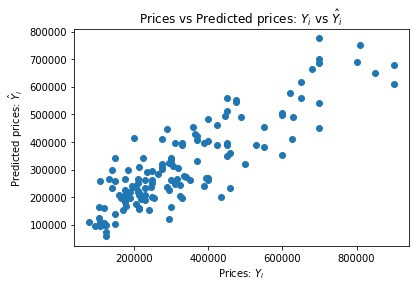

In [208]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

### Further work
- Imputing Floors variable based on other variables 
- Removing features based on OLS interpretation to improve Accuracy of the model
- Training on other Regression Techniques

### Time Spend on Dataset including  Documentation -2 hours
- Data Loading and understanding : 15mins <br>
- Exploring Challenges in Data : 15mins <br>
- Data Pre-processing : 25 mins <br>
- Data Exploration : 15mins <br>
- Modelling and Results Interpretation: 30mins <br>
- Modelling with Reduced Features : 15mins <br>